In [5]:
# Necessay imports
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt
import csv
import re
import matplotlib.gridspec as gridspec

from lightcurve_data import *
from lc_sine import *

In [6]:
df = pd.read_csv('flare_data.csv')

flare_df = df[df['Number of fitted flare profiles'] >= 2.0] # FLARES

no_flare_df = df[df['Number of fitted flare profiles'] < 2.0] # NOT FLARES

In [7]:
flare_df

,TIC,TESS Sector,Flare peak time (BJD),Flare amplitude (relative),Estimated flare energy 1,Estimated flare energy 2,Number of fitted flare profiles,Possible flare detection
8,67228,11,1618.6013,0.0041,1.01e+34,Nan,2.0,N
12,68069,11,1604.3220,0.1122,4.03e+32,3.65e+32,2.0,N
17,68069,11,1623.3567,0.1073,4.12e+32,3.72e+32,2.0,N
37,102723,11,1620.6816,0.0439,2.37e+33,1.33e+33,2.0,N
74,593228,5,1460.9271,0.0507,7.70e+32,4.80e+32,2.0,N
...,...,...,...,...,...,...,...,...
147633,520660922,39,2379.6243,0.2244,Nan,Nan,2.0,N
147639,735128403,39,2376.0454,0.4161,Nan,Nan,2.0,N
147652,1005005438,39,2376.4390,0.0282,6.16e+34,3.62e+34,2.0,N
147657,1005005438,39,2389.0737,0.0289,5.53e+34,3.25e+34,2.0,N


/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


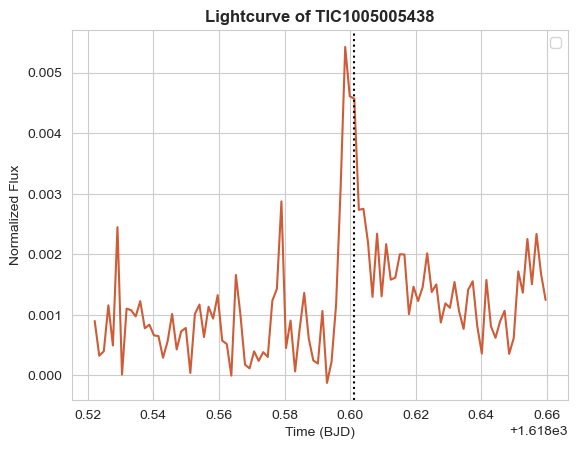

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


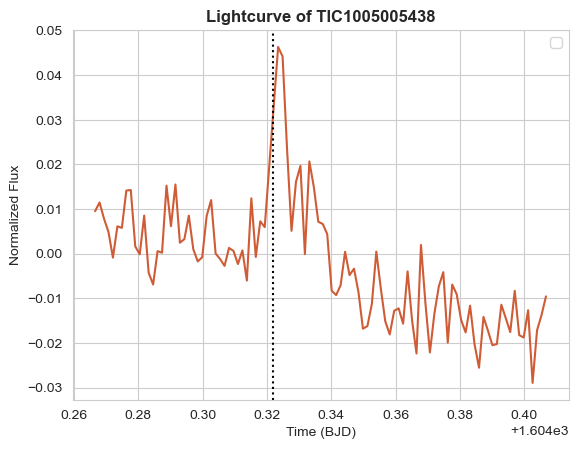

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


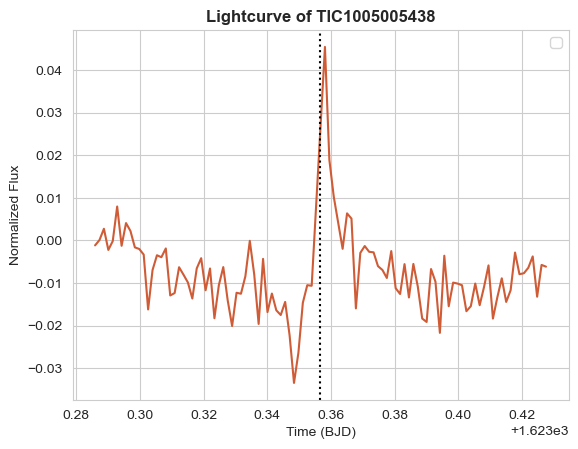

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


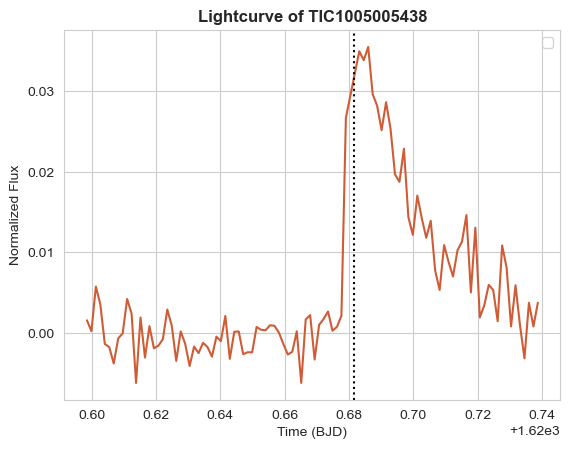

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


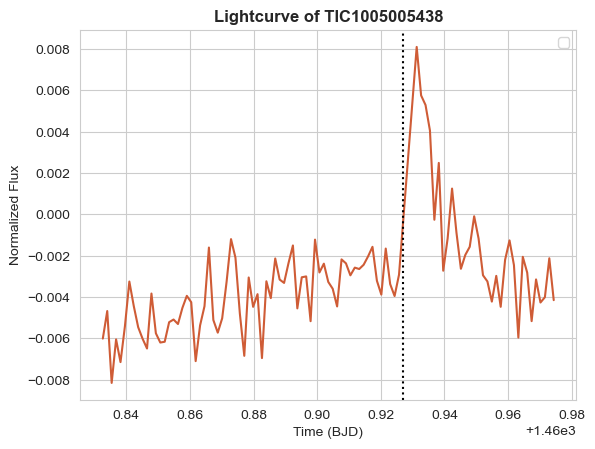

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


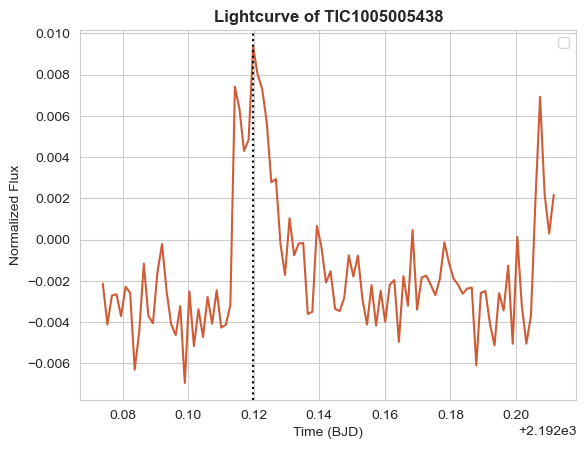

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


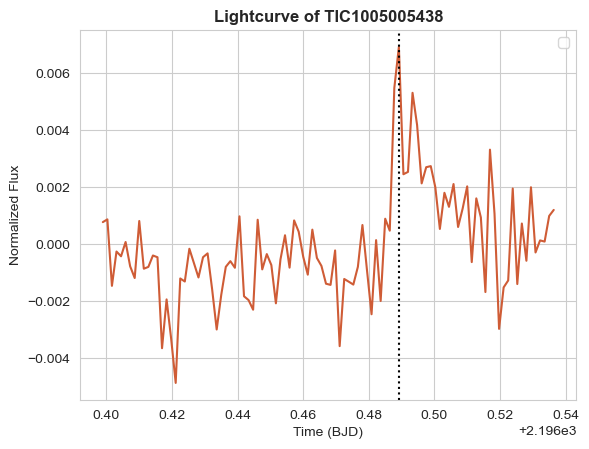

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-5.76e+01 ppm +/- 2.44e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-5.76e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/2992736555.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


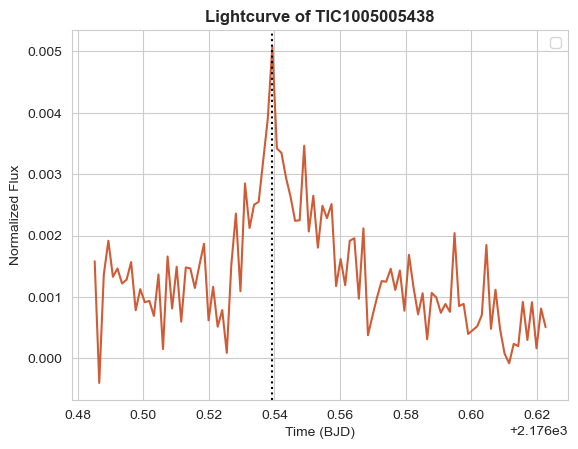

KeyboardInterrupt: 

In [4]:
window_size = 100

for _, row in flare_df[:15].iterrows():
    name = f'TIC{row['TIC']}'
    lightcurve_data = LightcurveData(name, 120)

    delta_x = lightcurve_data.time[1] - lightcurve_data.time[0]

    flare_time = row['Flare peak time (BJD)']
    peak_idx = np.argmin(np.abs(lightcurve_data.time - flare_time))

    offset = np.random.randint(-20, 20)
    start_idx = max(0, peak_idx - window_size//2 + offset)
    end_idx = min(len(lightcurve_data.time), start_idx + window_size)

    time = np.array(lightcurve_data.time[start_idx:end_idx])
    flux = np.array(lightcurve_data.flux[start_idx:end_idx])

    sns.set_style("whitegrid")
    plt.plot(time, flux, color = '#CF5C36')
    plt.axvline(x = row['Flare peak time (BJD)'], color = 'black', ls = 'dotted')
    plt.title('Lightcurve of TIC1005005438', fontweight = 'bold')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.show()